In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('data/train.csv') 

In [2]:
tst = pd.read_csv('data/test.csv')

In [3]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191859 entries, 0 to 191858
Data columns (total 27 columns):
id                      191859 non-null int64
last_price              191859 non-null float64
mid                     191859 non-null float64
opened_position_qty     138203 non-null float64
closed_position_qty     138203 non-null float64
transacted_qty          191859 non-null float64
d_open_interest         191859 non-null int64
bid1                    191859 non-null float64
bid2                    191859 non-null float64
bid3                    191859 non-null float64
bid4                    191859 non-null float64
bid5                    191859 non-null float64
ask1                    191859 non-null float64
ask2                    191859 non-null float64
ask3                    191859 non-null float64
ask4                    191859 non-null float64
ask5                    191859 non-null float64
bid1vol                 191859 non-null int64
bid2vol                 191859 

In [4]:
tst.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,592380,5178.4,5178.3,1.0,11.0,12.0,-10,5178.2,5178.0,5177.8,...,3,16,3,1,1,1,4,1,5,2
1,592381,5133.0,5132.9,1.0,0.0,1.0,1,5132.8,5132.6,5132.4,...,1,2,2,1,10,4,8,1,1,1
2,592382,5177.4,5178.0,2.0,0.0,2.0,2,5177.2,5176.8,5176.6,...,8,18,1,1,6,7,4,1,2,5
3,592383,5093.6,5093.9,0.0,2.0,2.0,-1,5093.2,5093.0,5092.8,...,8,5,4,3,1,1,1,11,6,2
4,592384,5189.2,5189.2,NaN,NaN,0.0,0,5188.8,5188.6,5188.4,...,1,5,1,3,3,3,2,1,3,4


In [ ]:
# we notice the only columns with NaN values are opened_position_qty  and closed_position_qty
# we need to either decide what to do with those or throw them away, since they highly correlate with transacted_qty 
# transacted_qty = opened_position_qty + closed_position_qty

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592380 entries, 0 to 592379
Data columns (total 28 columns):
id                      592380 non-null int64
last_price              592380 non-null float64
mid                     592380 non-null float64
opened_position_qty     419920 non-null float64
closed_position_qty     419920 non-null float64
transacted_qty          592380 non-null float64
d_open_interest         592380 non-null int64
bid1                    592380 non-null float64
bid2                    592380 non-null float64
bid3                    592380 non-null float64
bid4                    592380 non-null float64
bid5                    592380 non-null float64
ask1                    592380 non-null float64
ask2                    592380 non-null float64
ask3                    592380 non-null float64
ask4                    592380 non-null float64
ask5                    592380 non-null float64
bid1vol                 592380 non-null int64
bid2vol                 592380 

In [7]:
count_nan = len(df) - df.count()
count_nan

id                           0
last_price                   0
mid                          0
opened_position_qty     172460
closed_position_qty     172460
transacted_qty               0
d_open_interest              0
bid1                         0
bid2                         0
bid3                         0
bid4                         0
bid5                         0
ask1                         0
ask2                         0
ask3                         0
ask4                         0
ask5                         0
bid1vol                      0
bid2vol                      0
bid3vol                      0
bid4vol                      0
bid5vol                      0
ask1vol                      0
ask2vol                      0
ask3vol                      0
ask4vol                      0
ask5vol                      0
y                            0
dtype: int64

In [8]:
print(df['last_price'].describe())

count    592380.000000
mean       3965.639532
std          81.801597
min        3812.000000
25%        3896.400000
50%        3983.800000
75%        4039.600000
max        4115.800000
Name: last_price, dtype: float64


In [9]:
print(df['mid'].describe())

count    592380.000000
mean       3965.639078
std          81.801148
min        3812.100000
25%        3896.400000
50%        3983.700000
75%        4039.500000
max        4116.000000
Name: mid, dtype: float64


In [11]:
y = df.y

In [12]:
y.value_counts()

0    380925
1    211455
Name: y, dtype: int64

In [14]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa2c470>,
      dtype=object)

In [15]:
df_corr = df.corr()['y'][1:-1]
df_corr


# we see that strongest correlation is w/  bid1vol, makes sense, strongest negative w/  ask1vol 
# so like the more buyers less seleers - higher prob

last_price              0.019276
mid                     0.018940
opened_position_qty     0.032599
closed_position_qty     0.046323
transacted_qty          0.056453
d_open_interest        -0.015503
bid1                    0.018901
bid2                    0.018984
bid3                    0.018990
bid4                    0.018991
bid5                    0.018989
ask1                    0.018978
ask2                    0.019092
ask3                    0.019109
ask4                    0.019119
ask5                    0.019128
bid1vol                 0.086308
bid2vol                 0.029456
bid3vol                 0.009437
bid4vol                 0.007519
bid5vol                 0.003877
ask1vol                -0.126212
ask2vol                -0.025560
ask3vol                -0.008274
ask4vol                -0.007621
ask5vol                -0.009476
Name: y, dtype: float64

In [16]:
golden_features_list = df_corr[abs(df_corr) > 0.012].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 20 strongly correlated values with SalePrice:
bid1vol                 0.086308
transacted_qty          0.056453
closed_position_qty     0.046323
opened_position_qty     0.032599
bid2vol                 0.029456
last_price              0.019276
ask5                    0.019128
ask4                    0.019119
ask3                    0.019109
ask2                    0.019092
bid4                    0.018991
bid3                    0.018990
bid5                    0.018989
bid2                    0.018984
ask1                    0.018978
mid                     0.018940
bid1                    0.018901
d_open_interest        -0.015503
ask2vol                -0.025560
ask1vol                -0.126212
Name: y, dtype: float64


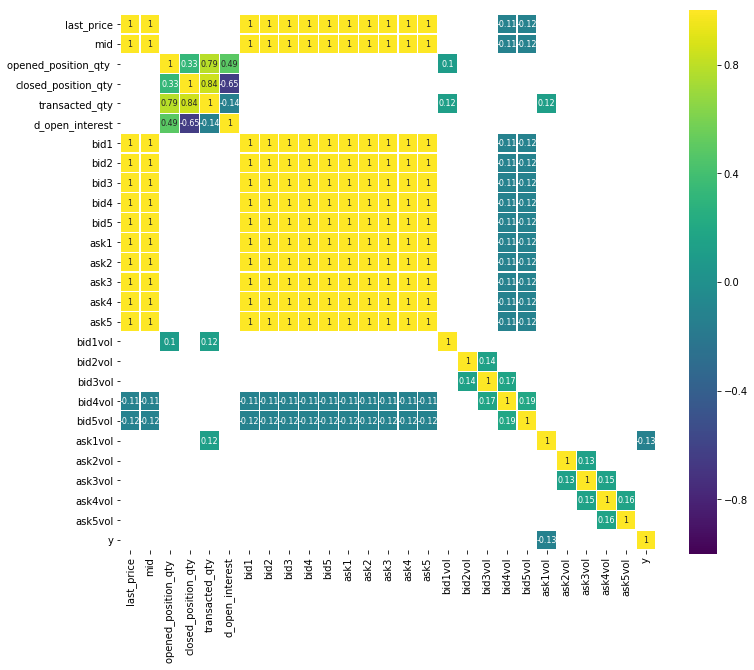

In [17]:
corr = df.drop('id', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [18]:
df.columns

Index(['id', 'last_price', 'mid', 'opened_position_qty ',
       'closed_position_qty', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'y'],
      dtype='object')

In [19]:
df = df.assign(value = lambda x: x.bid1vol / x.ask1vol)
df = df.assign(sm = lambda x: (x.bid1vol+x.bid2vol+x.bid3vol+x.bid4vol+x.bid5vol) / (x.ask1vol+x.ask2vol+x.ask3vol+x.ask4vol+x.ask5vol))


# I have an impression that an important metric is how many people bid relative to how many ask. 
# The table says bid1 and ask1 are 'the best', idk if its important, but i compared people who bid/asked those 
# and people who bid/asked overall, those are columns 'value' and 'sm'


train_data = df[['transacted_qty', 'bid1vol', 'bid2vol', 'd_open_interest',  'ask1vol', 'ask2vol', 'value', 'sm']]
train_data


,transacted_qty,bid1vol,bid2vol,d_open_interest,ask1vol,ask2vol,value,sm
0,103.0,8,1,0,6,1,1.333333,1.750000
1,55.0,7,6,-43,1,4,7.000000,1.347826
2,84.0,3,1,-69,1,16,3.000000,1.025000
3,37.0,10,13,-30,2,7,5.000000,1.782609
4,41.0,14,12,-35,1,3,14.000000,1.096774
5,29.0,1,6,-5,1,12,1.000000,0.658537
6,39.0,1,7,-34,11,15,0.090909,0.562500
7,28.0,1,2,-20,2,12,0.500000,0.702128
8,32.0,1,1,-28,1,2,1.000000,0.657143
9,15.0,1,17,-9,7,1,0.142857,1.400000


## Try Logistic Regression
Let us use RFE and RFECV to find optimal number of features and optimal feature selection for logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


cols = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']
X = df[cols]
y = df.y
# Build a logreg and compute the feature importances
model = LogisticRegression(solver='lbfgs', max_iter=200)
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['last_price', 'transacted_qty', 'd_open_interest', 'bid1', 'bid2vol', 'ask1vol', 'value', 'sm']


In [ ]:
# we see that the new features 'value' and 'sm' work pretty ok

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Optimal number of features: 8
Selected features: ['last_price', 'transacted_qty', 'd_open_interest', 'bid1', 'bid2vol', 'ask1vol', 'value', 'sm']


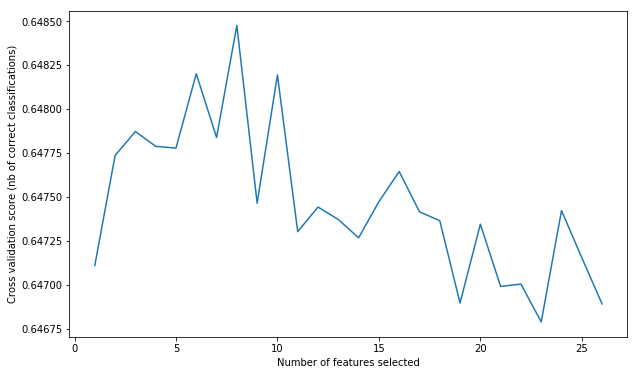

In [23]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(solver='lbfgs', max_iter=200), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# Optimal number of features: 8
# Selected features: ['last_price', 'transacted_qty', 'd_open_interest', 'bid1', 'bid2vol', 'ask1vol', 'value', 'sm']

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


cols = ['last_price', 'transacted_qty', 'd_open_interest', 'bid1', 'bid2vol', 'ask1vol', 'value', 'sm']
X = df[cols]
y = df.y

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss



In [45]:
logreg = LogisticRegression(solver='lbfgs', max_iter=300)
logreg.fit(X, y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
tst = tst.assign(value = lambda x: x.bid1vol / x.ask1vol)
tst = tst.assign(sm = lambda x: (x.bid1vol+x.bid2vol+x.bid3vol+x.bid4vol+x.bid5vol) / (x.ask1vol+x.ask2vol+x.ask3vol+x.ask4vol+x.ask5vol))

cols = ['last_price', 'transacted_qty', 'd_open_interest', 'bid1', 'bid2vol', 'ask1vol', 'value', 'sm']

X_test = tst[cols]
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.47937853, 0.26070575, 0.26690229, ..., 0.30244413, 0.28915223,
       0.37425338])

In [53]:
ydf = pd.DataFrame(y_pred_proba)

In [54]:
res = pd.concat([tst['id'], ydf], axis = 1, keys=['id', '0'])

In [55]:
pd.DataFrame(res).to_csv("data/proba.csv", index=None)

In [51]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression( solver='lbfgs', max_iter=200)



cols1 = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']
cols = ['last_price', 'transacted_qty', 'd_open_interest', 'bid1', 'bid2vol', 'ask1vol', 'value', 'sm']
X = df[cols]
results = cross_validate(modelCV, X, y, cv=4, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.648 (+/-0.002)
LogisticRegression average log_loss: 0.632 (+/-0.002)
LogisticRegression average auc: 0.634 (+/-0.006)


/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
# this submission got reasonable AUC of 0.59108 

#### try more params with logistic, also maybe with my superficial columns i have overfitting?

In [56]:
# Normalizing variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Try Random Forest

In [38]:
from sklearn.model_selection import train_test_split


cols = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']
cols_selection = ['last_price', 'mid', 'transacted_qty', 'bid1', 'ask1', 'ask4', 'ask5', 'ask1vol', 'value', 'sm']
X = df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.6623282352543975


In [ ]:
#0.662 seems ok, lets try this?

In [40]:
clf=RandomForestClassifier(n_estimators=100)


cols = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']

X = df[cols]


clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
tst = tst.assign(value = lambda x: x.bid1vol / x.ask1vol)
tst = tst.assign(sm = lambda x: (x.bid1vol+x.bid2vol+x.bid3vol+x.bid4vol+x.bid5vol) / (x.ask1vol+x.ask2vol+x.ask3vol+x.ask4vol+x.ask5vol))


X_test = tst[cols]
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.44      , 0.32      , 0.485     , ..., 0.55666667, 0.41      ,
       0.39      ])

In [43]:
ydf = pd.DataFrame(y_pred_proba)
res = pd.concat([tst['id'], ydf], axis = 1, keys=['id', '0'])
pd.DataFrame(res).to_csv("data/proba.csv", index=None)

In [ ]:
# I made a submission with this Random Forest with a lot of features, it gave very low AUC 0.54282

In [ ]:
# press F

In [39]:
clf.feature_importances_
feature_imp = pd.Series(clf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

sm                 0.083989
value              0.051514
bid5vol            0.046017
bid4vol            0.045784
ask5vol            0.045661
bid3vol            0.045642
ask3vol            0.045089
ask4vol            0.044851
bid2vol            0.042336
ask2vol            0.040589
last_price         0.040186
mid                0.036547
transacted_qty     0.032980
ask5               0.031839
bid5               0.031673
ask1               0.031641
bid1               0.031279
ask1vol            0.031219
ask4               0.031155
bid4               0.030997
d_open_interest    0.030899
ask3               0.030786
ask2               0.030648
bid3               0.030537
bid2               0.030530
bid1vol            0.025610
dtype: float64

In [ ]:
# interesting, this is very different feature importance order than for logistic regression. 
# nevertheless with both models we see that 'sm' and 'value' features that I added rank high with feature importance

In [35]:
cols_selection = ['last_price', 'transacted_qty',  'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
      'ask3vol', 'ask4vol', 'ask5vol', 'value', 'sm']
X = df[cols_selection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6544110199534083


In [ ]:
# so for random forest if I select 8-12 features it gives worse accuracy than taking all the features

In [37]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

from sklearn.ensemble import RandomForestClassifier

modelCV = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

y = df.y


cols = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']
cols_selected = ['last_price', 'mid', 'transacted_qty', 'bid1', 'ask1', 'ask4', 'ask5', 'ask1vol', 'value', 'sm']
X = df[cols]
results = cross_validate(modelCV, X, y, cv=4, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)

K-fold cross-validation results:
RandomForestClassifier average accuracy: 0.609 (+/-0.020)
RandomForestClassifier average log_loss: 0.663 (+/-0.011)
RandomForestClassifier average auc: 0.585 (+/-0.011)


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished
